In [111]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Combining train and test data set

train_df= pd.read_csv("..\Dataset\power-laws-forecasting-energy-consumption-training-data.csv",sep=';')
test_df=pd.read_csv("..\Dataset\power-laws-forecasting-energy-consumption-test-data.csv",sep=';')

In [113]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)

In [114]:
combined_df.head()

,obs_id,SiteId,Timestamp,ForecastId,Value
0,4852050,42,2016-10-18T02:45:00+00:00,1087,26397.049623
1,1638923,42,2016-10-18T11:45:00+00:00,1087,42958.364641
2,5748910,42,2016-10-18T20:45:00+00:00,1087,27096.919666
3,38199,42,2016-10-20T10:45:00+00:00,1087,50211.408087
4,1338204,42,2016-10-20T18:45:00+00:00,1087,50503.305105


In [115]:
new=combined_df.groupby('SiteId')['Value'].count()
new

SiteId
1        1120
2       41392
3         417
5        1156
6      167358
        ...  
301      2848
302    268160
303      2848
304       568
305      1156
Name: Value, Length: 267, dtype: int64

In [116]:
## Taking only site id 2

new_df_2=combined_df.loc[combined_df['SiteId']==2,['Timestamp','Value']]

In [117]:
# Converting hourly data values into daily data points

new_df_2['Timestamp'] = pd.to_datetime(new_df_2['Timestamp'])

# Setting the 'Timestamp' as the index
new_df_2.set_index('Timestamp', inplace=True)

# Resampling to daily frequency and summing up the energy consumption
daily_energy = new_df_2['Value'].resample('D').sum()

# Resetting the index to get a clean DataFrame
daily_energy_df = daily_energy.reset_index()

In [118]:
daily_energy_df

,Timestamp,Value
0,2013-01-01 00:00:00+00:00,9.863965e+05
1,2013-01-02 00:00:00+00:00,1.052226e+06
2,2013-01-03 00:00:00+00:00,9.225301e+05
3,2013-01-04 00:00:00+00:00,9.262394e+05
4,2013-01-05 00:00:00+00:00,8.774980e+05
...,...,...
1729,2017-09-26 00:00:00+00:00,1.166463e+06
1730,2017-09-27 00:00:00+00:00,1.239248e+06
1731,2017-09-28 00:00:00+00:00,1.283666e+06
1732,2017-09-29 00:00:00+00:00,1.154940e+06


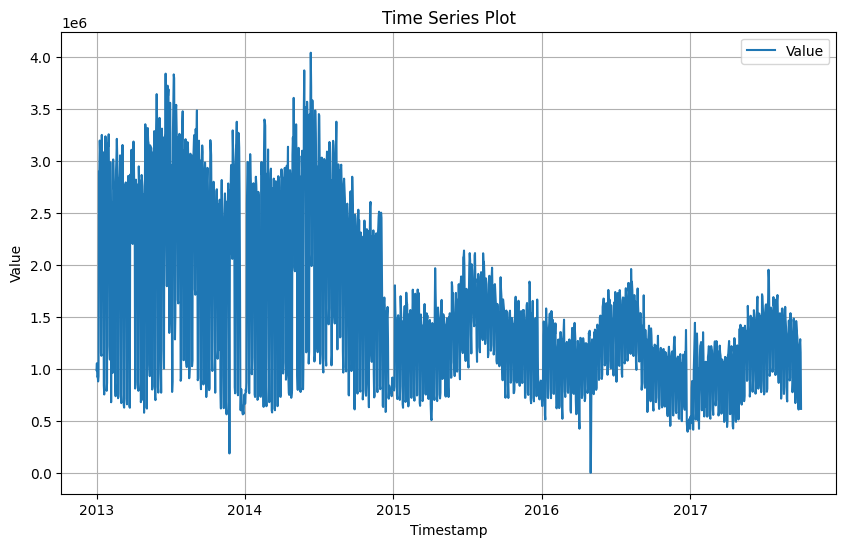

In [119]:
# Plot the time series
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(daily_energy_df['Timestamp'], daily_energy_df['Value'], label='Value')

# Formatting the plot
plt.title('Time Series Plot')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [120]:
# Filter for the years 2016 and 2017
df_2016_2017 = daily_energy_df[daily_energy_df['Timestamp'].dt.year.isin([2016, 2017])]


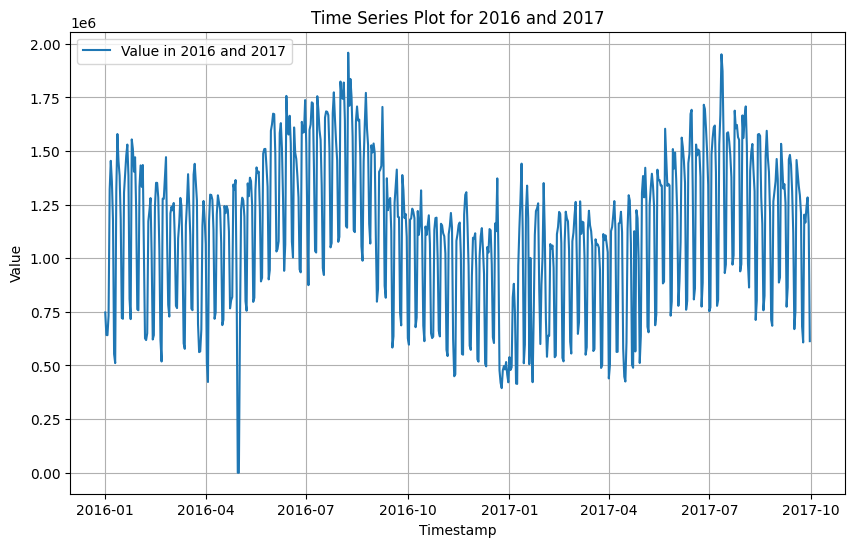

In [121]:
import matplotlib.pyplot as plt

# Plot the time series for the years 2016 and 2017
plt.figure(figsize=(10, 6))
plt.plot(df_2016_2017['Timestamp'], df_2016_2017['Value'], label='Value in 2016 and 2017')

# Formatting the plot
plt.title('Time Series Plot for 2016 and 2017')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


In [122]:
## geting weather dataset

weather_data=pd.read_csv("..\Dataset\power-laws-forecasting-energy-consumption-weather.csv",sep=';')
weather_data.head()

,Timestamp,Temperature,Distance,SiteId
0,2017-03-03T19:00:00+00:00,10.6,27.489346,51
1,2017-03-03T19:20:00+00:00,11.0,28.663082,51
2,2017-03-03T20:00:00+00:00,6.3,28.307039,51
3,2017-03-03T21:55:00+00:00,10.0,29.797449,51
4,2017-03-03T23:00:00+00:00,5.4,28.307039,51


In [123]:
## Taking only site id 2

weather_data_s2=weather_data.loc[weather_data['SiteId']==2,['Timestamp','Temperature']]

In [124]:
# Converting hourly data values into daily data points

weather_data_s2['Timestamp'] = pd.to_datetime(weather_data_s2['Timestamp'])

# Setting the 'Timestamp' as the index
weather_data_s2.set_index('Timestamp', inplace=True)

# Resampling to daily frequency and summing up the energy consumption
daily_weather = weather_data_s2['Temperature'].resample('D').mean()

# Resetting the index to get a clean DataFrame
daily_weather_df = daily_weather.reset_index()

In [125]:
daily_weather_df

,Timestamp,Temperature
0,2013-01-01 00:00:00+00:00,20.240000
1,2013-01-02 00:00:00+00:00,19.287500
2,2013-01-03 00:00:00+00:00,17.290323
3,2013-01-04 00:00:00+00:00,17.506250
4,2013-01-05 00:00:00+00:00,18.521875
...,...,...
1821,2017-12-27 00:00:00+00:00,19.175000
1822,2017-12-28 00:00:00+00:00,16.958929
1823,2017-12-29 00:00:00+00:00,18.376786
1824,2017-12-30 00:00:00+00:00,19.253571


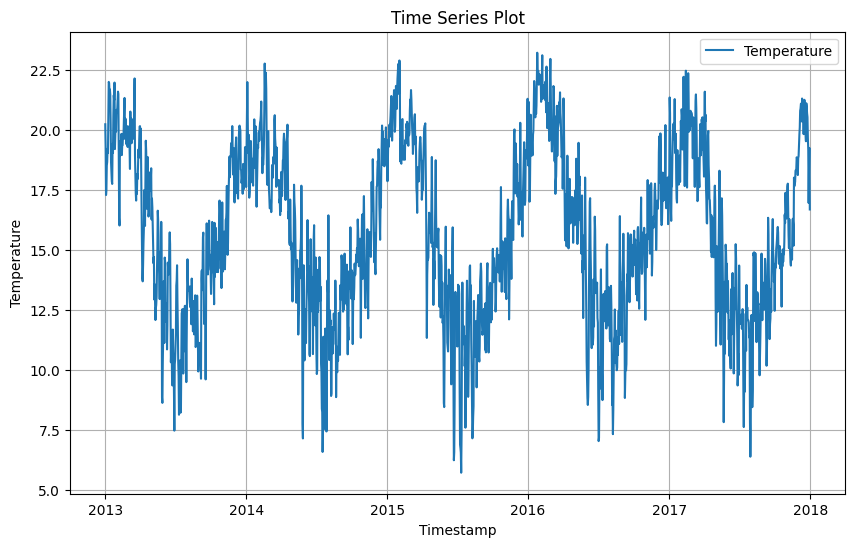

In [126]:
# Plot the time series
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(daily_weather_df['Timestamp'], daily_weather_df['Temperature'], label='Temperature')

# Formatting the plot
plt.title('Time Series Plot')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [127]:
# Joining Energy consumption and Weather data

consumption_data=pd.merge(daily_energy_df,daily_weather_df, on=['Timestamp'])

In [128]:
consumption_data

,Timestamp,Value,Temperature
0,2013-01-01 00:00:00+00:00,9.863965e+05,20.240000
1,2013-01-02 00:00:00+00:00,1.052226e+06,19.287500
2,2013-01-03 00:00:00+00:00,9.225301e+05,17.290323
3,2013-01-04 00:00:00+00:00,9.262394e+05,17.506250
4,2013-01-05 00:00:00+00:00,8.774980e+05,18.521875
...,...,...,...
1729,2017-09-26 00:00:00+00:00,1.166463e+06,16.289286
1730,2017-09-27 00:00:00+00:00,1.239248e+06,14.944643
1731,2017-09-28 00:00:00+00:00,1.283666e+06,14.646429
1732,2017-09-29 00:00:00+00:00,1.154940e+06,13.666071


In [129]:
# Create a new 'Date' column by extracting the date part from the 'Timestamp' column
consumption_data['Date'] = consumption_data['Timestamp'].dt.date

In [130]:
consumption_data.head()

,Timestamp,Value,Temperature,Date
0,2013-01-01 00:00:00+00:00,9.863965e+05,20.240000,2013-01-01
1,2013-01-02 00:00:00+00:00,1.052226e+06,19.287500,2013-01-02
2,2013-01-03 00:00:00+00:00,9.225301e+05,17.290323,2013-01-03
3,2013-01-04 00:00:00+00:00,9.262394e+05,17.506250,2013-01-04
4,2013-01-05 00:00:00+00:00,8.774980e+05,18.521875,2013-01-05


In [131]:
#Holiday Dataset

holiday_df = pd.read_csv(r"..\Dataset\power-laws-forecasting-energy-consumption-holidays.csv" ,delimiter=';')


In [132]:
holiday_df

,Date,Holiday,SiteId
0,2016-02-15,Washington's Birthday,1
1,2017-05-29,Memorial Day,1
2,2017-11-23,Thanksgiving Day,1
3,2017-12-29,New Years Eve Shift,1
4,2017-12-31,New Years Eve,1
...,...,...,...
8382,2015-12-26,Boxing Day,303
8383,2016-05-01,International Workers' Day,304
8384,2015-04-25,Liberation Day,304
8385,2016-03-28,Easter Monday,305


In [133]:
holiday_df['SiteId'].unique()

array([  1,  12,  13,  14,  15,  16,  17,  18,  20,  21,  22,  23,  25,
        26,  27,  32,  33,  34,  39,  40,  42,  43,  44,  45,  47,  48,
        49,  50,  51,  52,  53,  54,  57,  58,  59,  60,  62,  63,  64,
        65,  66,  67,  68,  72,  74,  75,  77,  78,  83,  85,  86,  87,
        88,  90,  93,  94,  96,  98,  99, 100, 101, 102, 105, 106, 107,
       108, 109, 110, 111, 112, 115, 116, 117, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 139, 140,
       141, 142, 143, 145, 146, 148, 149, 150, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 171,
       172, 173, 174, 176, 178, 180, 181, 182, 184, 185, 186, 189, 190,
       192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 216, 217, 218, 221, 222,
       223, 224, 226, 227, 228, 229, 230, 231, 237, 238, 239, 241, 243,
       246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 257, 25

In [134]:
holiday_count=holiday_df.groupby('SiteId')['Holiday'].count()
holiday_count

SiteId
1       62
12      25
13      52
14      56
15      41
      ... 
301    108
302    108
303    108
304     33
305     33
Name: Holiday, Length: 227, dtype: int64

In [135]:
holiday_data=holiday_df.loc[holiday_df['SiteId']==301]
holiday_data.drop(columns=['SiteId'],inplace=True)
holiday_data

C:\Users\melbi\AppData\Local\Temp\ipykernel_9640\1779299735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_data.drop(columns=['SiteId'],inplace=True)


,Date,Holiday
504,2017-12-26,Boxing Day
505,2009-04-10,Good Friday
506,2010-01-02,Berchtold's Day
507,2011-04-22,Good Friday
508,2012-05-17,Ascension Thursday
...,...,...
8359,2013-01-01,New year
8360,2013-05-20,Whit Monday
8361,2014-01-02,Berchtold's Day
8362,2015-04-06,Easter Monday


In [136]:
consumption_data_new=pd.merge(consumption_data,holiday_data, how='left')

In [137]:
consumption_data_new

,Timestamp,Value,Temperature,Date,Holiday
0,2013-01-01 00:00:00+00:00,9.863965e+05,20.240000,2013-01-01,NaN
1,2013-01-02 00:00:00+00:00,1.052226e+06,19.287500,2013-01-02,NaN
2,2013-01-03 00:00:00+00:00,9.225301e+05,17.290323,2013-01-03,NaN
3,2013-01-04 00:00:00+00:00,9.262394e+05,17.506250,2013-01-04,NaN
4,2013-01-05 00:00:00+00:00,8.774980e+05,18.521875,2013-01-05,NaN
...,...,...,...,...,...
1729,2017-09-26 00:00:00+00:00,1.166463e+06,16.289286,2017-09-26,NaN
1730,2017-09-27 00:00:00+00:00,1.239248e+06,14.944643,2017-09-27,NaN
1731,2017-09-28 00:00:00+00:00,1.283666e+06,14.646429,2017-09-28,NaN
1732,2017-09-29 00:00:00+00:00,1.154940e+06,13.666071,2017-09-29,NaN


In [144]:
# Convert the 'Date' columns to datetime
consumption_data['Date'] = pd.to_datetime(consumption_data['Date'])
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])

# Merge the two datasets on 'Date'
merged_df = pd.merge(consumption_data, holiday_data, on='Date', how='left')


C:\Users\melbi\AppData\Local\Temp\ipykernel_9640\1483519308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])


In [147]:
merged_df

,Timestamp,Value,Temperature,Date,Holiday
0,2013-01-01 00:00:00+00:00,9.863965e+05,20.240000,2013-01-01,New year
1,2013-01-02 00:00:00+00:00,1.052226e+06,19.287500,2013-01-02,Berchtold's Day
2,2013-01-03 00:00:00+00:00,9.225301e+05,17.290323,2013-01-03,Working Day
3,2013-01-04 00:00:00+00:00,9.262394e+05,17.506250,2013-01-04,Working Day
4,2013-01-05 00:00:00+00:00,8.774980e+05,18.521875,2013-01-05,Working Day
...,...,...,...,...,...
1729,2017-09-26 00:00:00+00:00,1.166463e+06,16.289286,2017-09-26,Working Day
1730,2017-09-27 00:00:00+00:00,1.239248e+06,14.944643,2017-09-27,Working Day
1731,2017-09-28 00:00:00+00:00,1.283666e+06,14.646429,2017-09-28,Working Day
1732,2017-09-29 00:00:00+00:00,1.154940e+06,13.666071,2017-09-29,Working Day


In [146]:
merged_df['Holiday']=merged_df['Holiday'].fillna('Working Day')